In [456]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
from scipy import stats
import pprint

In [400]:
soccer = pd.read_csv("https://sports-statistics.com/database/soccer-data/england-premier-league-2005-to-2006.csv")
for i in range(2006,2020):
    soccer = soccer.loc[:,'Div':'AR']
    start = str(i)
    stop = str(i+1)
    link = "https://sports-statistics.com/database/soccer-data/england-premier-league-"+start+"-to-"+stop+".csv"
    print("Downloading data from ", link)
    df = pd.read_csv(link)
    df = df.loc[:,'Div':'AR']
    current = soccer
    soccer = pd.concat([current,df], axis=0)
    
    

soccer

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Time
0,E0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,NaN
1,E0,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,NaN
2,E0,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,NaN
3,E0,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,NaN
4,E0,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,E0,01/01/2020,Watford,Wolves,2.0,1.0,H,1.0,0.0,H,...,4.0,12.0,6.0,4.0,7.0,3.0,1.0,1.0,0.0,15:00
204,E0,01/01/2020,Man City,Everton,2.0,1.0,H,0.0,0.0,D,...,2.0,11.0,11.0,3.0,6.0,0.0,4.0,0.0,0.0,17:30
205,E0,01/01/2020,Norwich,Crystal Palace,1.0,1.0,D,1.0,0.0,H,...,3.0,12.0,9.0,2.0,5.0,5.0,0.0,0.0,0.0,17:30
206,E0,01/01/2020,West Ham,Bournemouth,4.0,0.0,H,3.0,0.0,H,...,2.0,3.0,12.0,9.0,2.0,1.0,2.0,0.0,0.0,17:30


In [401]:
soccer_copy = soccer.copy()
#run when wanting original without having to rerun download
soccer = soccer_copy

In [403]:
soccer.isna().sum()

Div            1
Date           1
HomeTeam       1
AwayTeam       1
FTHG           1
FTAG           1
FTR            1
HTHG           1
HTAG           1
HTR            1
Referee        1
HS             1
AS             1
HST            1
AST            1
HF             1
AF             1
HC             1
AC             1
HY             1
AY             1
HR             1
AR             1
Time        5321
dtype: int64

### Looks like there is a row missing, along with a bunch of Time values, so lets drop the missing rown and the Time column.

In [404]:
soccer.drop(['Time'], axis = 1, inplace = True)
soccer.dropna(how = 'all', inplace = True)
soccer.isna().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [405]:
soccer.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG        float64
FTAG        float64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HF          float64
AF          float64
HC          float64
AC          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

### We should have Date be a Date object

In [406]:
soccer['Date'] = pd.to_datetime(soccer['Date'])
soccer

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,2.0,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,7.0,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,8.0,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,2.0,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,E0,2020-01-01,Watford,Wolves,2.0,1.0,H,1.0,0.0,H,...,3.0,4.0,12.0,6.0,4.0,7.0,3.0,1.0,1.0,0.0
204,E0,2020-01-01,Man City,Everton,2.0,1.0,H,0.0,0.0,D,...,7.0,2.0,11.0,11.0,3.0,6.0,0.0,4.0,0.0,0.0
205,E0,2020-01-01,Norwich,Crystal Palace,1.0,1.0,D,1.0,0.0,H,...,4.0,3.0,12.0,9.0,2.0,5.0,5.0,0.0,0.0,0.0
206,E0,2020-01-01,West Ham,Bournemouth,4.0,0.0,H,3.0,0.0,H,...,7.0,2.0,3.0,12.0,9.0,2.0,1.0,2.0,0.0,0.0


### Next, lets make dummy collumns for the FTR (full time result) and HTR (half time result) columns. 

In [407]:
soccer = pd.get_dummies(soccer, columns = ['FTR','HTR'])
soccer

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,Referee,HS,...,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,2.0,2.0,M Riley,3.0,...,0.0,2.0,0.0,0.0,0,1,0,0,1,0
1,E0,2005-08-13,Everton,Man United,0.0,2.0,0.0,1.0,G Poll,10.0,...,3.0,1.0,0.0,0.0,1,0,0,1,0,0
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,0.0,0.0,R Styles,15.0,...,1.0,2.0,0.0,0.0,0,1,0,0,1,0
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,0.0,0.0,C Foy,15.0,...,2.0,3.0,0.0,0.0,0,1,0,0,1,0
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,0.0,0.0,M Halsey,4.0,...,2.0,3.0,1.0,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,E0,2020-01-01,Watford,Wolves,2.0,1.0,1.0,0.0,A Madley,9.0,...,3.0,1.0,1.0,0.0,0,0,1,0,0,1
204,E0,2020-01-01,Man City,Everton,2.0,1.0,0.0,0.0,A Marriner,16.0,...,0.0,4.0,0.0,0.0,0,0,1,0,1,0
205,E0,2020-01-01,Norwich,Crystal Palace,1.0,1.0,1.0,0.0,J Moss,15.0,...,5.0,0.0,0.0,0.0,0,1,0,0,0,1
206,E0,2020-01-01,West Ham,Bournemouth,4.0,0.0,3.0,0.0,G Scott,14.0,...,1.0,2.0,0.0,0.0,0,0,1,0,0,1


Our data is in a cleaned format. Now we can begin some analysis

# Referee Data
One element we plan to investigate is referee bias. There is a lot of data available, but many of them have relatively small sample sizes. Plus, the data is not formatted in a way that makes it easy to check stats by referee. In the next few steps, we will reshape and filter our data in three ways:
- Group the data by referee and home team so we can then perfrom some simple calculations based on overall games
- We will then filter this data to exclude Referees/Teams that do not have a large enough sample size (less than 10 games)
- We will also group the data by teams to get their average stats and compare that with Referee specific stats per team.

In [408]:
grouped = soccer.groupby(['Referee','HomeTeam'])
ref_game_dat = grouped['FTR_H'].agg([('HomeTeam_Wins','sum')])
ref_game_dat['HomeTeam_Losses'] = grouped['FTR_A'].agg(['sum'])['sum']
ref_game_dat['HomeTeam_Draw'] = grouped['FTR_D'].agg(['sum'])['sum']
ref_game_dat['Total_Games'] = grouped['FTR_H'].agg(['count'])
ref_game_dat['Home_Win_Per'] = round(ref_game_dat['HomeTeam_Wins']/ref_game_dat['Total_Games']*100,2)
ref_game_dat['Yellow_Card_Avg'] = grouped['HY'].agg(['mean'])
ref_game_dat['Red_Card_Avg'] = grouped['HR'].agg(['mean'])
ref_game_dat


HomeTeam_Wins  HomeTeam_Losses  HomeTeam_Draw  \
Referee  HomeTeam                                                          
A D'Urso Fulham                        0                0              1   
A Madley Brighton                      2                0              0   
         Leicester                     0                0              1   
         Norwich                       0                1              0   
         Sheffield United              0                1              0   
...                                  ...              ...            ...   
U Rennie Watford                       0                1              1   
         West Brom                     0                1              0   
         West Ham                      1                1              1   
         Wigan                         0                1              1   
l Mason  Leicester                     0                0              1   

                           Total_Games  Home_Win_Per  Yellow_Card_Avg  \
Referee  HomeTeam                                                       
A D'Urso Fulham                      1          0.00         0.000000   
A Madley Brighton                    2        100.00         1.000000   
         Leicester                   1          0.00         0.000000   
         Norwich                     1          0.00         1.000000   
         Sheffield United            1          0.00         1.000000   
...                                ...           ...              ...   
U Rennie Watford                     2          0.00         2.000000   
         West Brom                   1          0.00         0.000000   
         West Ham                    3         33.33         2.666667   
         Wigan                       2          0.00         0.000000   
l Mason  Leicester                   1          0.00         4.000000   

                           Red_Card_Avg  
Referee  HomeTeam                        
A D'Urso Fulham                     0.0  
A Madley Brighton                   0.0  
         Leicester                  0.0  
         Norwich                    0.0  
         Sheffield United           0.0  
...                                 ...  
U Rennie Watford                    0.0  
         West Brom                  0.0  
         West Ham                   0.0  
         Wigan                      0.0  
l Mason  Leicester                  0.0  

[968 rows x 7 columns]

In [409]:
filtered_dat = ref_game_dat[dat['Total_Games']>=15]
filtered_dat

HomeTeam_Wins  HomeTeam_Losses  HomeTeam_Draw  \
Referee    HomeTeam                                                   
A Marriner Arsenal               13                5              3   
           Chelsea                8                3              4   
           Everton               10                4              6   
           Liverpool             11                1              7   
           Man City              14                2              1   
...                             ...              ...            ...   
M Oliver   Tottenham             11                2              2   
P Dowd     Bolton                 6                6              5   
           Everton                8                2              7   
           Liverpool             13                0              5   
           Tottenham             12                4              0   

                      Total_Games  Home_Win_Per  Yellow_Card_Avg  Red_Card_Avg  
Referee    HomeTeam                                                             
A Marriner Arsenal             21         61.90         1.238095      0.047619  
           Chelsea             15         53.33         1.133333      0.000000  
           Everton             20         50.00         1.550000      0.000000  
           Liverpool           19         57.89         1.105263      0.052632  
           Man City            17         82.35         1.470588      0.058824  
...                           ...           ...              ...           ...  
M Oliver   Tottenham           15         73.33         1.800000      0.000000  
P Dowd     Bolton              17         35.29         1.352941      0.058824  
           Everton             17         47.06         1.352941      0.058824  
           Liverpool           18         72.22         1.388889      0.055556  
           Tottenham           16         75.00         1.250000      0.062500  

[61 rows x 7 columns]

In [410]:
grouped = soccer.groupby(['HomeTeam'])
team_data = grouped['FTR_H'].agg([('Wins','sum')])
team_data['Losses'] = grouped['FTR_A'].agg(['sum'])['sum']
team_data['Draws'] = grouped['FTR_D'].agg(['sum'])['sum']
team_data['Total_Games'] = grouped['FTR_H'].agg(['count'])
team_data['Win_Percentage'] = round(team_data['Wins']/team_data['Total_Games']*100,2)
team_data['Yellow_Card_Avg'] = grouped['HY'].agg(['mean'])
team_data['Red_Card_Avg'] = grouped['HR'].agg(['mean'])
team_data

,Wins,Losses,Draws,Total_Games,Win_Percentage,Yellow_Card_Avg,Red_Card_Avg
HomeTeam,,,,,,,
Arsenal,184,33,60,277,66.43,1.447653,0.057762
Aston Villa,72,78,69,219,32.88,1.484018,0.059361
Birmingham,26,20,30,76,34.21,1.486842,0.092105
Blackburn,59,40,34,133,44.36,1.699248,0.120301
Blackpool,5,9,5,19,26.32,1.157895,0.000000
Bolton,54,44,35,133,40.60,1.421053,0.067669
Bournemouth,31,32,23,86,36.05,1.569767,0.046512
Brighton,17,15,17,49,34.69,1.632653,0.081633
Burnley,40,44,22,106,37.74,1.537736,0.000000


### Analysis
- Now that the data is properly formatted and cleaned, we can begin our analysis. We will primarily be analyzing referee bias by looking at Red Cards and Yellow Cards, since referees have decision over these factors.
- We begin analysis by comparing a teams overall card average to their card average per referee.
- If a team's card average per referee is two standard deviations from the teams overall card average we will "suspect" that referee for bias toward that team. 
- Once we've selected our suspected referees, we will then run a t-test between the games where the referee reffed for the Home Team and then take a sample of the same size from the rest of the Home Team's games and compare the card data. This will be run 100 times and we will count the number of times the p-value is less than 0.05. 

In [479]:
refs = set(filtered_dat.reset_index()['Referee'])
pp = pprint.PrettyPrinter()


#Checks the p-value between each ref and their suspected bias teams
def check_p(cat, bdict, run):
    pval_d = defaultdict(lambda: defaultdict(lambda: [0,0,0]))
    b_refs = bdict.keys()
    for i in range(run):
        for b_ref in b_refs:
            r_teams = bias_dict[b_ref]
            for r_team in r_teams:
                n = int(filtered_dat.loc[b_ref].loc[r_team]['Total_Games'])
                team_total = soccer[soccer['HomeTeam']==r_team]
                tot_no_ref = team_total[team_total['Referee'] != b_ref]
                team_test = tot_no_ref.sample(n)[cat]
                ref_total = soccer[soccer['HomeTeam']== r_team]
                ref_test = ref_total[ref_total['Referee'] == b_ref][cat]
                rv = np.var(ref_test)
                tv = np.var(team_test)
                e_var = False
                if rv != 0 and tv != 0:
                    e_var = rv/tv < 4 or tv/rv < 4
                res = stats.ttest_ind(ref_test, team_test, equal_var=e_var)
                if not np.isnan(res[1]):
                    if res[1] < 0.05:
                        pval_d[b_ref][r_team][2]+=1
                    current = pval_d[b_ref][r_team]
                    pval_d[b_ref][r_team][1]+=1
                    pval_d[b_ref][r_team][0] = (current[0]+res[1])/(current[1])

    return pval_d


#Selects the refs and teams that are suspected of bias (means are different by 2 standard deviances)
def find_bias(arg,cat):
    bias_dict = defaultdict(lambda: [])
    for ref in refs:  
        ref_dat = filtered_dat.loc[ref]
        teams = ref_dat.index.tolist()
        for team in teams:
            team_avg = team_data.loc[team][arg]
            ref_avg = ref_dat.loc[team][arg]
            sd = np.std(soccer[soccer['HomeTeam'] == team][cat])
            if abs(ref_avg-team_avg)*2 > sd:
                bias_dict[ref].append(team)
                
    bias = check_p(cat,bias_dict,100)
    pp.pprint(bias) #for debuging purposes
    
    for ref in bias.keys():  
        ref_dat = filtered_dat.loc[ref]
        teams = list(bias[ref].keys())
        dic = {'Team': [], 'Type': [], 'Avg': []}
        sns_dat = pd.DataFrame(dic)

        for team in teams:
            if bias[ref][team][2]>30:
                team_avg = team_data.loc[team][arg]
                ref_avg = ref_dat.loc[team][arg]
                sns_dat.loc[len(sns_dat.index)] = [team,'actual',team_avg] 
                sns_dat.loc[len(sns_dat.index)] = [team,'ref',ref_avg]
        
        if not sns_dat.empty:
            g = sns.catplot(data=sns_dat, kind="bar",x="Team", y="Avg", hue="Type", aspect = 4)
            g.despine(left=True)
            g.set_axis_labels("", arg)
            g.legend.set_title(ref)
            

defaultdict(<function check_p.<locals>.<lambda> at 0x7fc928679dc0>,
            {'C Foy': defaultdict(<function check_p.<locals>.<lambda>.<locals>.<lambda> at 0x7fc768a2daf0>,
                                  {'Arsenal': [0.00010307623563604904, 100, 86],
                                   'Man City': [0.008763061640589438, 100, 1],
                                   'Sunderland': [0.001020730095016874,
                                                  100,
                                                  3]}),
             'H Webb': defaultdict(<function check_p.<locals>.<lambda>.<locals>.<lambda> at 0x7fc908d67430>,
                                   {'Chelsea': [0.0069943690459207345, 100, 5],
                                    'Man City': [0.006635596931059361, 100, 2],
                                    'Man United': [0.0014528249389119383,
                                                   100,
                                                   38]}),
             'M Atkinson

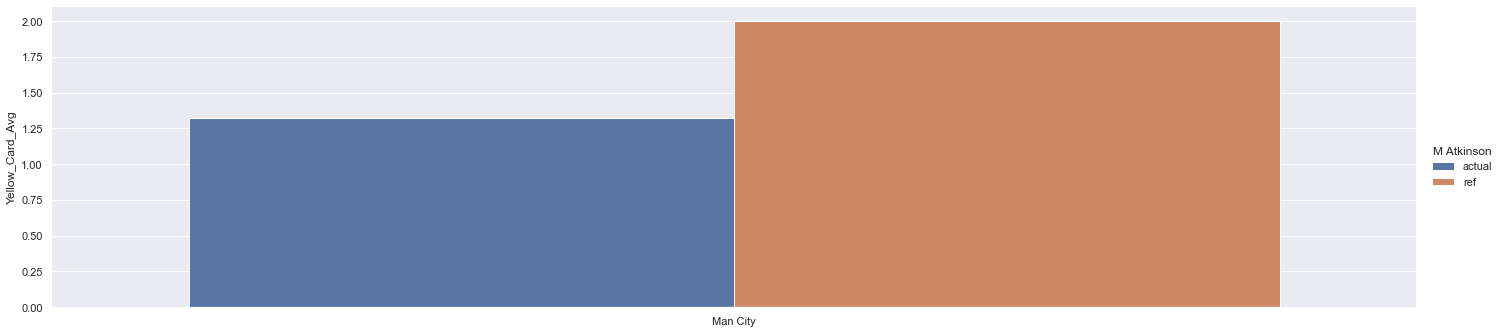

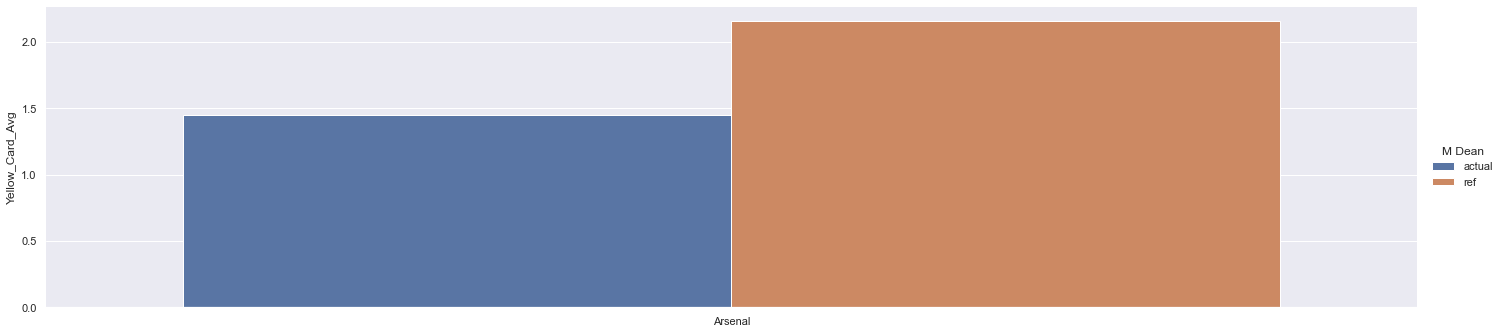

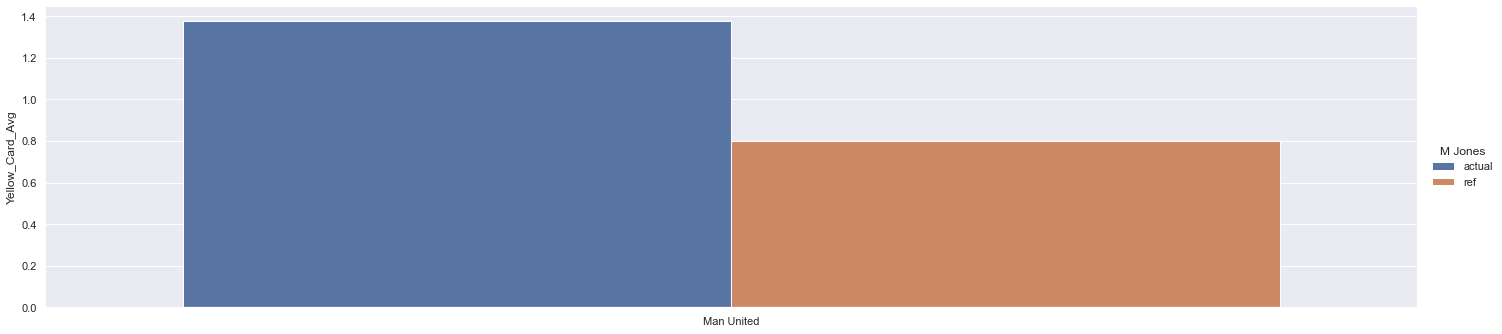

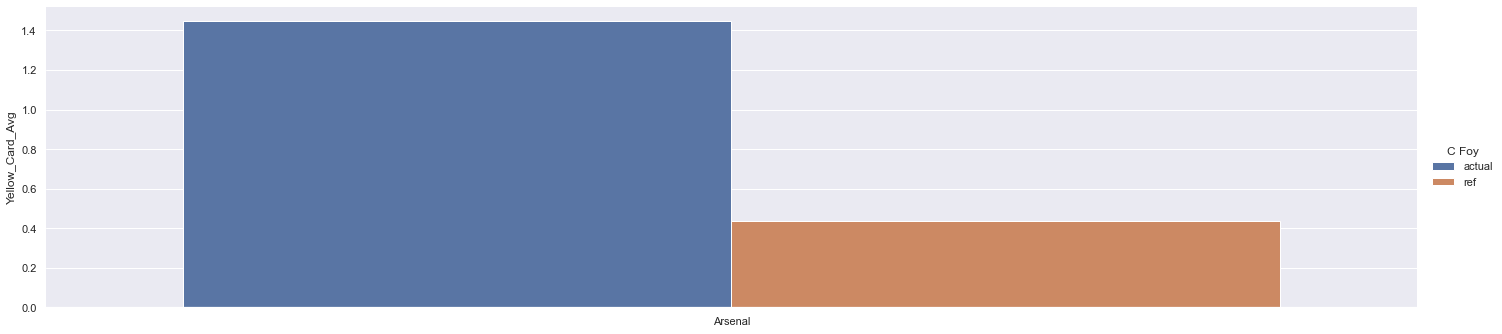

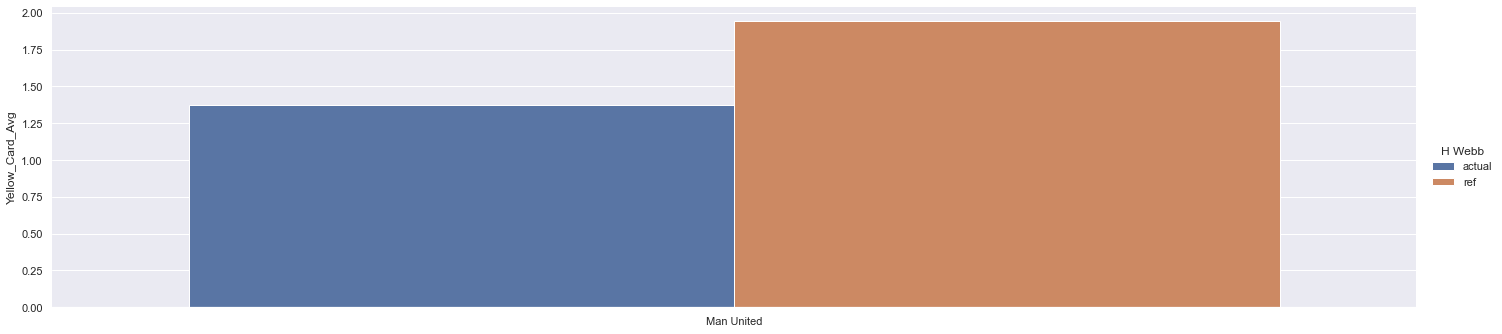

In [480]:
find_bias('Yellow_Card_Avg','HY')